<a href="https://colab.research.google.com/github/ageltser1/OXY_T1/blob/main/SCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import random

In [2]:
import requests
def download_file(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"File successfully downloaded as {filename}")
    else:
        print("Failed to retrieve the file. Status code:", response.status_code)

In [3]:
# READ THE INPUT DATA
url = 'https://raw.githubusercontent.com/ageltser1/OXY_T1/refs/heads/main/OXY_HD_Git2.csv'
filename = "OXY_HD_Git2.csv"
download_file(url, filename)

File successfully downloaded as OXY_HD_Git2.csv


In [4]:
input_filename = filename
df = pd.read_csv(input_filename, dtype='float64', header=0)  # Read CSV while keeping all columns
input_data = df.to_numpy()


print('input_data:', input_data.shape)

print()
"""

# Load your data into a DataFrame
df = pd.read_csv('OXY_HD_Git2.csv')

# Check for NaN values
nan_counts = df.isna().sum()

# Display columns with NaN values and their counts
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)

# Optional: Display rows with NaN values
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

"""

print()


print(df.isna().sum())
print()


# PRINT SOME OF THE INPUT DATA EXAMPLES
print('OXY_Close_PD   OXY_Volume       VIX_Close     PD_11-5_AVGs       11-5_Label')
for i in range(0, 19):
    print('{:4.0e}'.format(input_data[i,0]), '      ',
          '{:4.0e}'.format(input_data[i,1]), '         ',
          '{:3.0e}'.format(input_data[i,2]), '          ',
          '{:3.0e}'.format(input_data[i,3]), '             ',
          '{:3.0e}'.format(input_data[i, 4]), '        '
          )

input_data: (3830, 6)


OXY_Close_PD    0
OXY_Volume      0
VIX_Close       0
PD_11-5_AVGs    0
12-5_Label      0
OXY_Close       0
dtype: int64

OXY_Close_PD   OXY_Volume       VIX_Close     PD_11-5_AVGs       11-5_Label
-3e-02        8e+06           2e+01            -5e-03               0e+00         
1e-03        1e+07           3e+01            -4e-03               0e+00         
2e-02        7e+06           3e+01            -1e-03               0e+00         
-1e-02        9e+06           2e+01            3e-03               2e+00         
-3e-03        5e+06           2e+01            5e-03               0e+00         
1e-02        1e+07           2e+01            4e-03               0e+00         
1e-02        1e+07           2e+01            9e-03               0e+00         
2e-02        6e+06           2e+01            2e-02               0e+00         
1e-02        5e+06           2e+01            2e-02               0e+00         
-8e-03        4e+06           2e+01        

In [5]:
training_size = int(len(input_data) * 0.8)

train_data = input_data[:training_size]       # First 3062 rows
test_data = input_data[training_size:]        # Remaining rows

print('train_data:', train_data.shape)
print('test_data:', test_data.shape)

train_data: (3064, 6)
test_data: (766, 6)


In [55]:
nFeatures = 4
ground_truth_col = 4

train_X = train_data[:, :nFeatures]            # columns 0 to 3 (features)
train_truth = train_data[:, ground_truth_col]  # column 5 (labels)

#train_truth = train_truth-1   # train_truth has values ranging between 1 and 3.  To match the softmax output
                              # module, the Ground Truth array needs to have values ranging between 0 and 2, so
                              # we simply subtract 1 from the values.
print('train_truth shape[0]', train_truth.shape[0])
# for the test data
test_X = test_data[:, :nFeatures]  ## columns 0 to 3 (features)
test_truth = test_data[:, ground_truth_col]   # column 5 (labels)

print('train_X', train_X.shape)
print('train_truth', train_truth.shape)
print('test_X', test_X.shape)
print('test_truth', test_truth.shape)
print()
n_test_examples = test_X.shape[0]


print('OXY_Close_PD   OXY_Volume       VIX_Close     PD_11-5_AVGs       11-5_Label')
for i in range(0, 19):
    print('  {:4.0e}'.format(train_X[i,0]), '       ',
          '{:4.0e}'.format(train_X[i,1]), '        ',
          '{:3.0e}'.format(train_X[i,2]), '          ',
          '{:3.0e}'.format(train_X[i,3]), '             ',
          '{:3.0e}'.format(train_truth[i]), '        '
          )

train_truth shape[0] 3064
train_X (3064, 4)
train_truth (3064,)
test_X (766, 4)
test_truth (766,)

OXY_Close_PD   OXY_Volume       VIX_Close     PD_11-5_AVGs       11-5_Label
  -3e-02         8e+06          2e+01            -5e-03               0e+00         
  1e-03         1e+07          3e+01            -4e-03               0e+00         
  2e-02         7e+06          3e+01            -1e-03               0e+00         
  -1e-02         9e+06          2e+01            3e-03               2e+00         
  -3e-03         5e+06          2e+01            5e-03               0e+00         
  1e-02         1e+07          2e+01            4e-03               0e+00         
  1e-02         1e+07          2e+01            9e-03               0e+00         
  2e-02         6e+06          2e+01            2e-02               0e+00         
  1e-02         5e+06          2e+01            2e-02               0e+00         
  -8e-03         4e+06          2e+01            1e-02               0e+

In [52]:
# SCALE EACH FEATURE TO BE CENTERED ON ZERO, WITH A STANDARD DEVIATION OF 1
scaler_obj = preprocessing.StandardScaler().fit(train_X)   # scaler_obj will scale each Feature (column) independently
train_X_std = scaler_obj.transform(train_X)  # scale each training data Feature (column)
test_X_std = scaler_obj.transform(test_X)  # scale each test data Feature (column)


for i in range(0,30):
    print(train_X_std[i,0], '      ',
          train_X_std[i,1], '         ',
          train_X_std[i,2], '          ',
        train_X_std[i,3], '             '
         )


print('train_X', train_X_std.shape)
print('train_truth', train_truth.shape)
print('test_X', test_X_std.shape)
print('test_truth', test_truth.shape)


-1.0346872681390893        -0.11355669239954297           0.55015398572914            -0.2713161918750511              
0.026386225601865064        0.11916225070739062           1.2432963259441066            -0.2119704812607038              
0.7207380579210529        -0.19464539743551415           0.98199266687566            -0.06979885533387571              
-0.47797344980335105        0.024496386985073247           0.8637182715396778            0.18741417716934447              
-0.12509092048333204        -0.3271468695152728           0.6698034327088365            0.28810788296246953              
0.49023911196648606        0.27625783736693726           0.7509451321192461            0.2506681242006719              
0.3758473874446989        0.21851676712256185           0.8733454704233524            0.5213728924791875              
0.6719550934857422        -0.22912509160456712           0.5941629892139771            0.8903817493393695              
0.4142540696975872        -0.31775

In [42]:
# DISCUSSION #5:  The DNN Model

n_possible_outcomes = 3
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[nFeatures,]))               # Input Layer
model.add(keras.layers.Dense(nFeatures, activation='relu'))                # Hidden Layer 1
model.add(keras.layers.Dense(nFeatures, activation='relu'))                # Hidden Layer 2
model.add(keras.layers.Dense(n_possible_outcomes, activation='softmax'))   # Output Layer

model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(0.001), metrics=["accuracy"])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# DISCUSSION #6:  Run the model
# -----------------------------------------------------------------------------------------------------------------
# The TensorFlow 'fit' method is used to compute the best weights for the Training Examples.  The 136 weights
# are trained over 10 epochs.  Note that the softmax Output Layer outputs a probability for each of the possible
# outcomes.
# Each probability will be a number between 0 and 1.  For each Training Example, the largest of the 3 probabilites
# is chosen as the 'answer' to be compared against the Ground Truth value.  The comparison of the Training Examples
# to their Ground Truth values are stored in the 'history' object for plotting.
#
# The Test Examples are also input to the fit method and the predictions from our new model (derived from the
# Training Examples) are compared against the matching Test Ground Truth values.  This gives a validation
# measure of how the model will do when data it has never seen before are input.  The comparison of the Test
# Examples to their Ground Truth values are also stored in the 'history' object for plotting.

# New Running Sum = ((Current Running Sum +1)*(New Gain + 1)) - 1
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
nEpochs = 100
history = model.fit(train_X_std, train_truth, batch_size=16, epochs=nEpochs, validation_data=(test_X_std,test_truth))


Epoch 1/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7624 - loss: 0.9580 - val_accuracy: 0.8029 - val_loss: 0.7715
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7773 - loss: 0.7643 - val_accuracy: 0.8029 - val_loss: 0.6695
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7888 - loss: 0.6919 - val_accuracy: 0.8029 - val_loss: 0.6432
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7944 - loss: 0.6495 - val_accuracy: 0.8029 - val_loss: 0.6299
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7983 - loss: 0.6324 - val_accuracy: 0.8029 - val_loss: 0.6237
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7977 - loss: 0.6317 - val_accuracy: 0.8029 - val_loss: 0.6151
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7854 - loss: 0.6426 - val_accuracy: 0.8029 - val_loss: 0.6079
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7918 - loss: 0.6251 - val_accu


Training Accuracy = 0.79
Training Loss     = 0.59
Test Accuracy     = 0.80
Test Loss         = 0.58


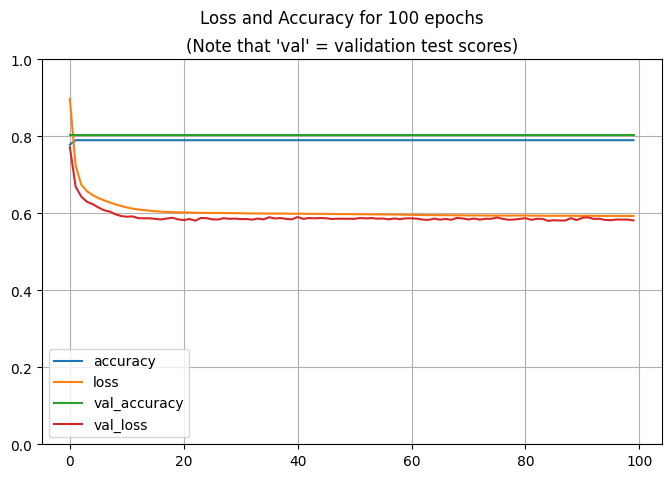

In [44]:
# DISCUSSION #7:  Print/plot information about the model's accuracy
# PRINT THE ACCURACY AND LOSS
train_loss,train_accuracy = model.evaluate(train_X_std, train_truth, batch_size=16, verbose=0)
print()
print("Training Accuracy = {:.2f}".format(train_accuracy))
print("Training Loss     = {:.2f}".format(train_loss))
test_loss,test_accuracy = model.evaluate(test_X_std, test_truth, batch_size=16, verbose=0)
print("Test Accuracy     = {:.2f}".format(test_accuracy))
print("Test Loss         = {:.2f}".format(test_loss))

# PLOT THE ACCURACY AND LOSS
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.suptitle("Loss and Accuracy for " + str(nEpochs) + " epochs")
plt.title("(Note that 'val' = validation test scores)")
plt.show()


In [45]:
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# DISCUSSION #8:  Print a Confusion Matrix on the Test Examples for the 3rd Class Passengers
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# PRINT A CONFUSION MATRIX FOR THE TEST EXAMPLES, FOR JUST 3RD CLASS
probabilities = model.predict(test_X_std)  # probabilities = 2D array (rows=examples, cols=the 3 outcome probabilities)
predicted_Action = tf.argmax(probabilities, axis=1).numpy()   # predictions is a 1D array of the 'winning' class (rows=examples)

# Remap predicted_class and test_truth so we're only dealing with 3rd class tickets.  This means we will set all 1st and
# 2nd class tickets to False (==0) and the 3rd class tickets to True (==1)
nPredictions = predicted_Action.shape[0]
predicted_HOLD = np.zeros(nPredictions)    # Preset everything to zero (False)
test_truth_for_HOLD = np.zeros(nPredictions)     # Preset everything to zero (False)
for i in range (nPredictions):
      if predicted_Action[i] == 2:  predicted_HOLD[i] = 2   # Reset this example to True
      if test_truth[i] == 1:     test_truth_for_HOLD[i] = 1    # Reset this example to True

# the confusion matrix on the remapped values for 3rd class tickets
((n_true_negatives, n_false_positives), (n_false_negatives, n_true_positives)) \
      = confusion_matrix(test_truth_for_HOLD, predicted_HOLD)
print()
print()
print('CONFUSION MATRIX for Predicting 3rd Class Tickets.  Passenger counts for', n_test_examples, 'Test Examples')
print()
print('         Correctly Predicted is NOT 3rd Class Ticket:      ', n_true_negatives, '  |  ', n_false_negatives, ' :Predicted is NOT 3rd Class Ticket, but actually was')
print('                                         ------------------------------------------------')
print('         Predicted 3rd Class Ticket, but actually was NOT:  ', n_false_positives, '  | ', n_true_positives, ' :Correctly Predicted is 3rd Class Ticket')
print()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


CONFUSION MATRIX for Predicting 3rd Class Tickets.  Passenger counts for 766 Test Examples

         Correctly Predicted is NOT 3rd Class Ticket:       689   |   77  :Predicted is NOT 3rd Class Ticket, but actually was
                                         ------------------------------------------------
         Predicted 3rd Class Ticket, but actually was NOT:   0   |  0  :Correctly Predicted is 3rd Class Ticket



In [56]:
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# DISCUSSION #9:  Print some examples
# -----------------------------------------------------------------------------------------------------------------
# Here I've printed out the first 20 Test Examples, the 3 resulting probabilities, and the resulting prediction,
# and the actual Ground Truth outcome. The predictions should be correct about 83% of the time.
#
# Note that the model, itself, is relatively opaque.  It can predict the ticket class of an individual, but it's
# difficult to know why!  And this is a simple model with only 120 weights.  It would be nearly impossible to translate
# those weights into an understanding of the relative importance of each input Feature.  Therefore, the model is rather
# like a black box.  Sadly, this opacity is typical of AI models.
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# PRINT SOME OF THE INPUT DATA EXAMPLES
print()


# PRINT SOME OF THE INPUT DATA EXAMPLES
print('  OXY_Close_PD   OXY_Volume     VIX_Close        OXY_PD_AVGs       Label   ||  Hold(0)   Sell(1)    Buy(2)     Prediction   Real_AVG_Label')
for i in range(0, 7):
    print('     {:4.0e}'.format(input_data[i,0]), '      ',
          '{:4.0e}'.format(input_data[i,1]), '         ',
          '{:3.0e}'.format(input_data[i,2]), '          ',
          '{:3.0e}'.format(input_data[i,3]), '         ',
           input_data[i, 4], '        '
           '{:4.2f}'.format(probabilities[i,0]), '    ',
          '{:4.2f}'.format(probabilities[i,1]), '    ',
          '{:4.2f}'.format(probabilities[i,2]), '    =  ',
          predicted_Action[i], '      ',
          '{:3.0f}'.format(int(test_truth[i]))
          )

print()



  OXY_Close_PD   OXY_Volume     VIX_Close        OXY_PD_AVGs       Label   ||  Hold(0)   Sell(1)    Buy(2)     Prediction   Real_AVG_Label
     -3e-02        8e+06           2e+01            -5e-03           0.0         0.64      0.09      0.26     =   0          0
     1e-03        1e+07           3e+01            -4e-03           0.0         0.67      0.13      0.20     =   0          0
     2e-02        7e+06           3e+01            -1e-03           0.0         0.67      0.07      0.26     =   0          0
     -1e-02        9e+06           2e+01            3e-03           2.0         0.62      0.27      0.12     =   0          1
     -3e-03        5e+06           2e+01            5e-03           0.0         0.60      0.23      0.17     =   0          1
     1e-02        1e+07           2e+01            4e-03           0.0         0.87      0.05      0.08     =   0          0
     1e-02        1e+07           2e+01            9e-03           0.0         0.87      0.07      0.06 